<a href="https://colab.research.google.com/github/maileyyy/ML/blob/main/assignment%201%20decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/maileyyy/ML/main/winequality-red.csv")

In [51]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [79]:

# Assuming your dataset is loaded into a DataFrame called 'df'
# and the quality scores are in a column named 'quality'

# Create a new column 'quality_label' based on the condition
wine_df['quality_label'] = wine_df['quality'].apply(lambda x: 0 if x <= 7 else 1)

# Now, the 'quality_label' column will contain 0 for bad and 1 for good


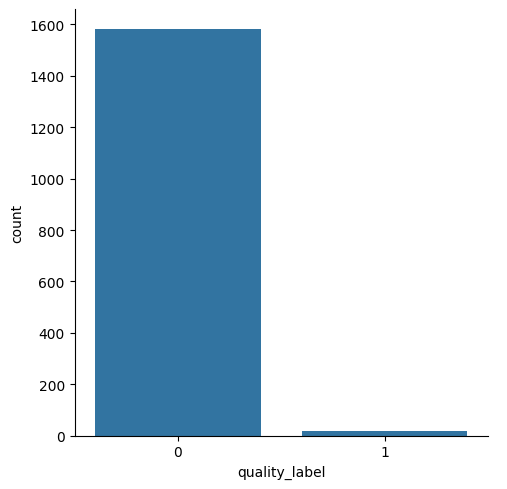

In [80]:
sns.catplot(x = "quality_label", data = wine_df, kind = "count")

In [81]:
wine_df['quality_label'].value_counts()

,count
quality_label,
0,1581
1,18


In [82]:
wine_df['quality_label'].value_counts()/wine_df['quality_label'].shape[0]

,count
quality_label,
0,0.988743
1,0.011257


In [83]:
# Handling Imbalanced Class - Data Augmentation
from sklearn.utils import resample
df_0 = wine_df[wine_df['quality_label'] == True]
df_1 = wine_df[wine_df['quality_label'] == False]

In [95]:
df_0_resample = resample(df_0, replace = True, n_samples = 600, random_state = 42)

In [97]:
wine_df1 = pd.concat([df_0_resample, df_1])

In [98]:
wine_df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,1
1061,9.1,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,1
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [99]:
wine_df1['quality_label'].value_counts()

,count
quality_label,
0,1581
1,600


In [100]:
wine_df1['quality_label'].value_counts()/wine_df1['quality_label'].shape[0]

,count
quality_label,
0,0.724897
1,0.275103


In [101]:
wine_df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [102]:
x=wine_df1.drop(columns=['quality','quality_label'])
y=wine_df1['quality_label']

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [116]:
clf_tree = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:0.724897,1:0.275103})


In [120]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.724897, 1: 0.275103},
                       criterion='entropy')

In [121]:
clf_tree.get_depth()

11

In [122]:
clf_tree.score(x_test, y_test)

0.9954233409610984

In [123]:
clf_tree.score(x_train, y_train)

1.0

In [124]:
import graphviz
from sklearn import tree
from IPython.display import Image

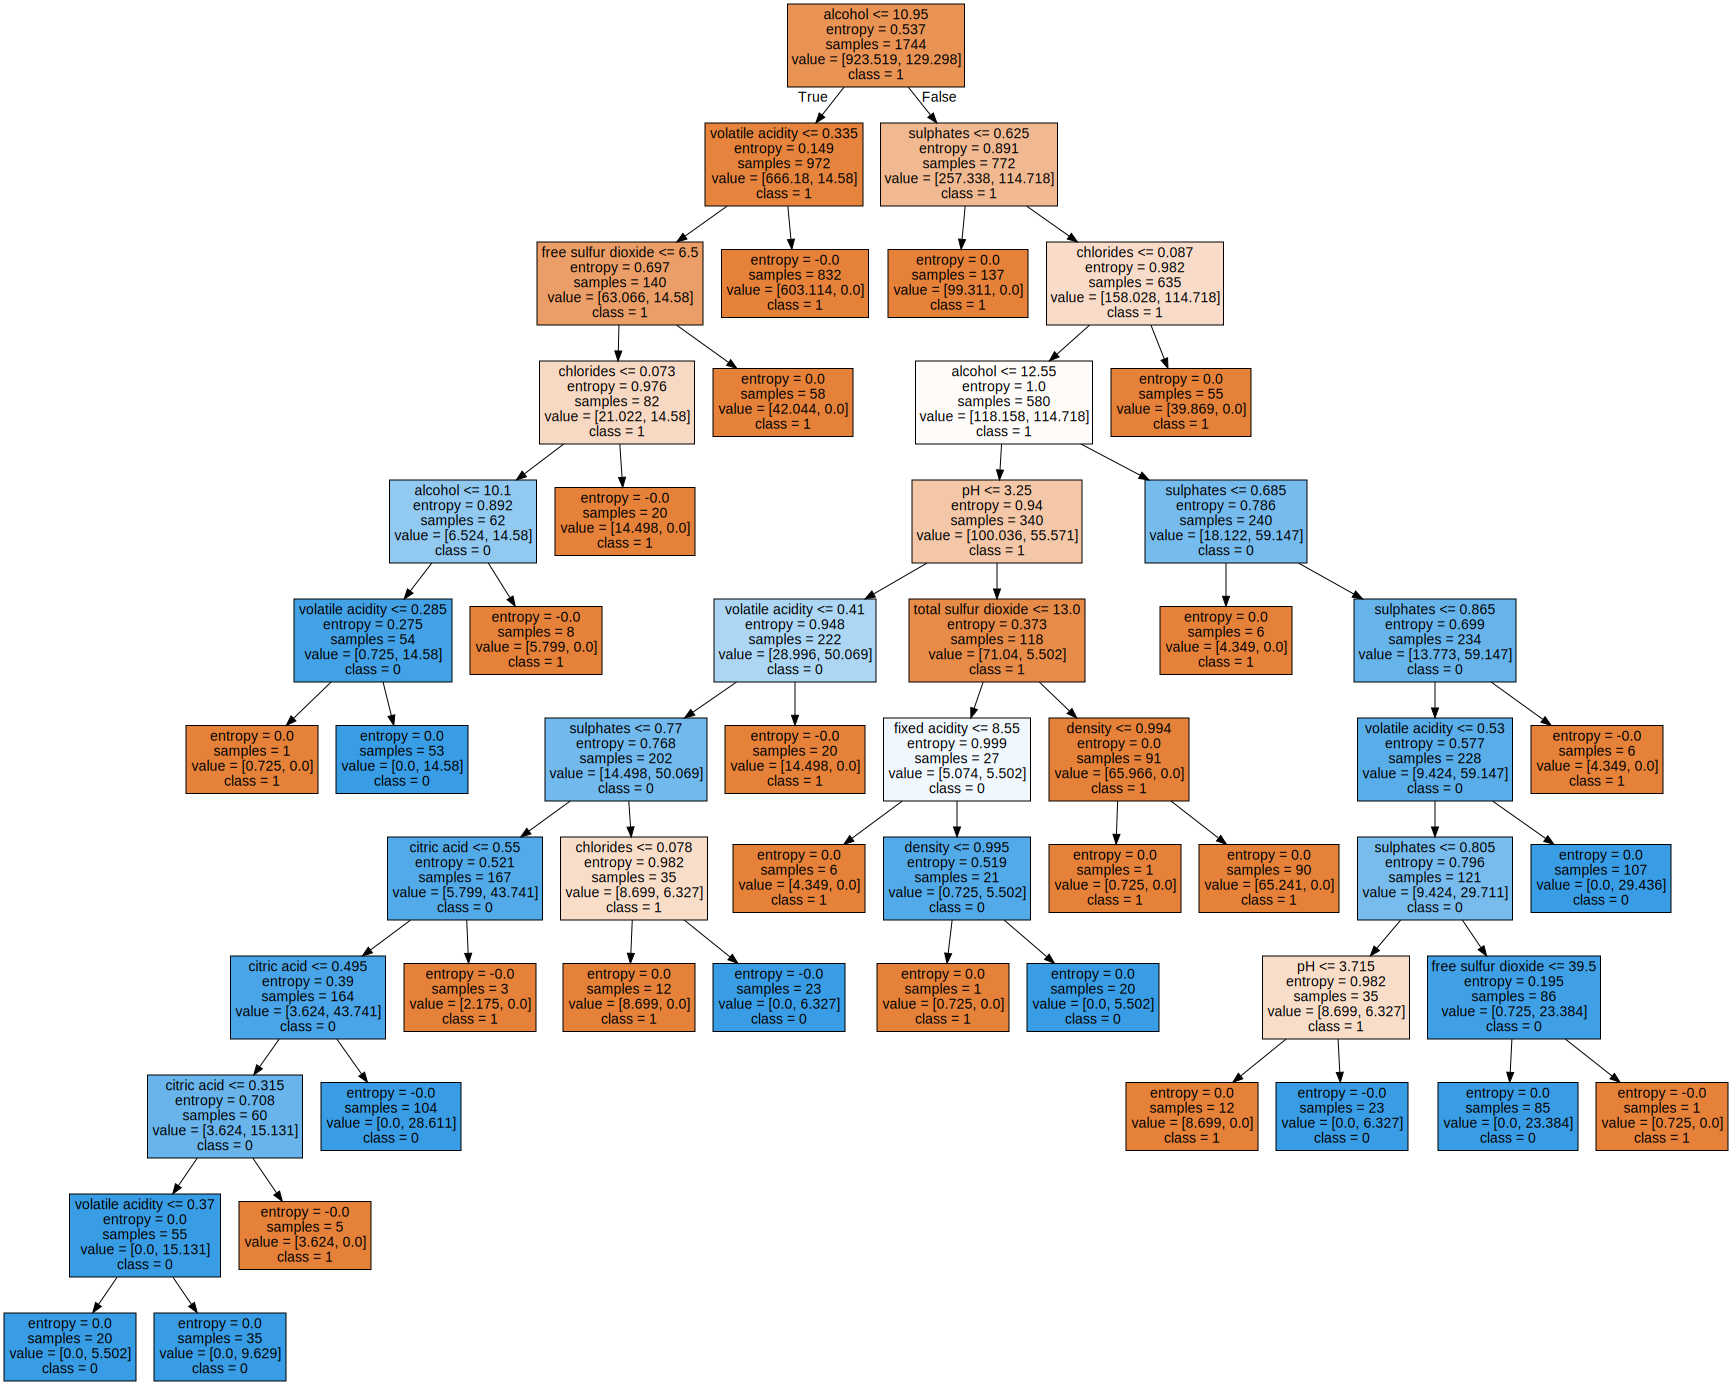

In [126]:
dot_data = tree.export_graphviz(clf_tree, feature_names = x.columns, class_names = y.unique().astype(str), filled = True)
graph = graphviz.Source(dot_data, format = 'png')
graph